# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [38]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Agregue aqui el resto de las librerias que necesite
# from ...
# import ...

## Lectura de Datos

In [39]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv('./us_2020_election_speeches.csv')
df_speeches



,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
...,...,...,...,...,...,...
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech
265,Democratic Candidates,Transcript: Speeches at the Iowa Caucuses – Be...,Bernie Sanders: (00:08)\r\nThank you. Thank yo...,"Feb 4, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\r\nI worked so hard for ...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech
267,Donald Trump,Donald Trump New Jersey Rally Speech Transcrip...,Donald Trump: (01:22)\r\nThank you. Thank you....,"Jan 28, 2020","Wildwood, New Jersey",Campaign Speech


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [40]:

# Parte 1.A - Revisión inicial de los datos


df_speeches_copy = df_speeches.copy()

# Separar los speakers en filas individuales
df_speeches_copy = df_speeches_copy.assign(speaker=df_speeches_copy['speaker'].str.split(','))
df_speeches_copy = df_speeches_copy.explode('speaker')
df_speeches_copy['speaker'] = df_speeches_copy['speaker'].str.strip()

#Eliminar filas donde speaker sea NaN
#df_speeches_copy = df_speeches_copy.dropna(subset=['speaker'])

#Eliminar filas donde speaker contenga "Multiple"
#df_speeches_copy = df_speeches_copy[~df_speeches_copy['speaker'].str.contains('Multiple', case=False, na=False)]

# Mostrar estructura general del DataFrame
print("Información general del DataFrame:")
print(df_speeches.info())
print("--------------------------------------------------")
# Mostrar primeros registros
print("\nPrimeras filas del DataFrame:")
display(df_speeches.head())
print("--------------------------------------------------")






Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   speaker   266 non-null    object
 1   title     269 non-null    object
 2   text      269 non-null    object
 3   date      269 non-null    object
 4   location  251 non-null    object
 5   type      248 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB
None
--------------------------------------------------

Primeras filas del DataFrame:


,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall


--------------------------------------------------


## Entradas nulas de los discuros


Conteo de valores nulos por columna:
speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64
--------------------------------------------------


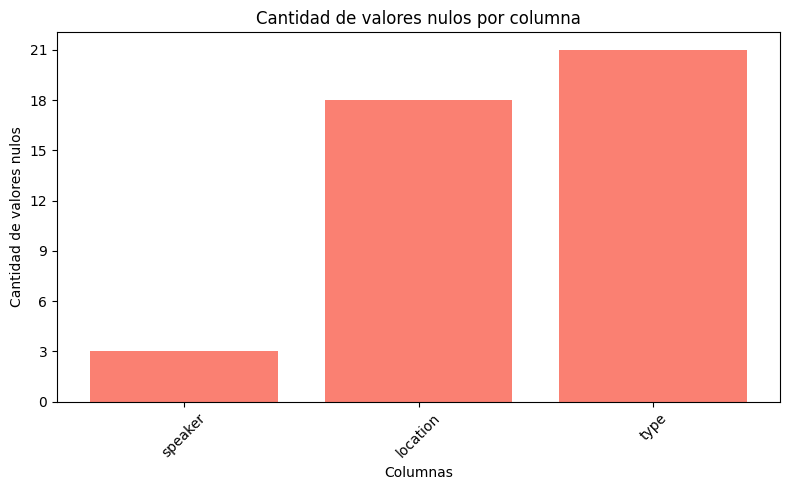

In [41]:
from matplotlib.ticker import MaxNLocator

# Verificar valores nulos
print("\nConteo de valores nulos por columna:")
print(df_speeches.isnull().sum())
print("--------------------------------------------------")



# Obtener cantidad de nulos por columna (y filtrar si querés)
null_counts = df_speeches.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Opcional: solo columnas con nulos

# Graficar
plt.figure(figsize=(8, 5))
bars = plt.bar(null_counts.index, null_counts.values, color='salmon')
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45)

# Forzar eje Y con números enteros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## Discursos por candidatos


Cantidad de discursos por orador/a:
speaker
Joe Biden                                 71
Donald Trump                              53
Mike Pence                                19
Bernie Sanders                            16
Kamala Harris                             11
                                          ..
Joe Biden, Al Gore                         1
Joe Biden, Bernie Sanders                  1
Tulsi Gabbard                              1
Donna Brazile                              1
Pete Buttigieg,Amy Klobuchar, O’Rourke     1
Name: count, Length: 71, dtype: int64
(71,)
--------------------------------------------------


C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\4200601058.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts_more_than_one, x='count', y='speaker', palette='viridis')


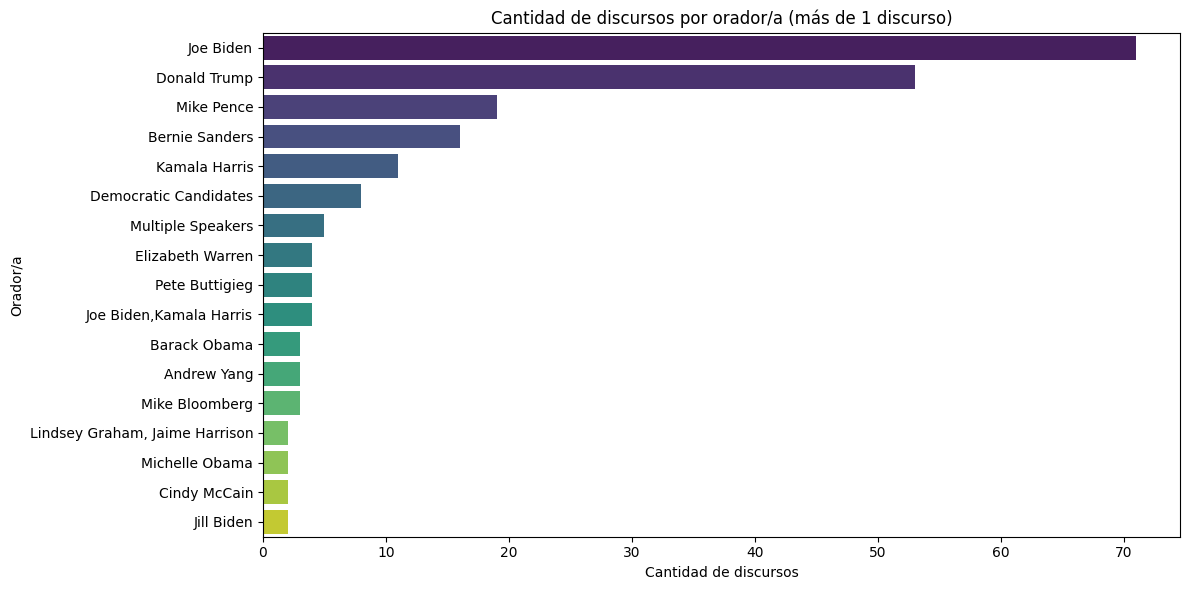

Oradores/as con solo 1 discurso:


,speaker
0,"Kamala Harris, Mike Pence"
1,David Perdue
2,"Donald Trump, Joe Biden"
3,Ivanka Trump
4,Tom Cotton
5,Rudy Giuliani
6,Lou Holtz
7,Karen Pence
8,Jack Brewer
9,Kellyanne Conway


In [42]:
# Conteo de discursos por candidato/a
print("\nCantidad de discursos por orador/a:")
speech_counts = df_speeches['speaker'].value_counts()
print(speech_counts)
print(speech_counts.shape)
print("--------------------------------------------------")

# Convertir a DataFrame y ordenar
df_counts = speech_counts.reset_index()
df_counts.columns = ['speaker', 'count']

# Filtrar oradores con más de un discurso
df_counts_more_than_one = df_counts[df_counts['count'] > 1]

# Ordenar por la cantidad de discursos
df_counts_more_than_one = df_counts_more_than_one.sort_values(by='count', ascending=False)

# Crear gráfico de oradores con más de un discurso
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts_more_than_one, x='count', y='speaker', palette='viridis')
plt.title('Cantidad de discursos por orador/a (más de 1 discurso)')
plt.xlabel('Cantidad de discursos')
plt.ylabel('Orador/a')
plt.tight_layout()
plt.show()

# Filtrar oradores con un solo discurso (sobre el df original)
df_counts_single = df_counts[df_counts['count'] == 1]

# Mostrar tabla con los oradores con un solo discurso
print("Oradores/as con solo 1 discurso:")
display(df_counts_single[['speaker']].reset_index(drop=True))

C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\3091055234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='count', y='speaker', palette='mako')


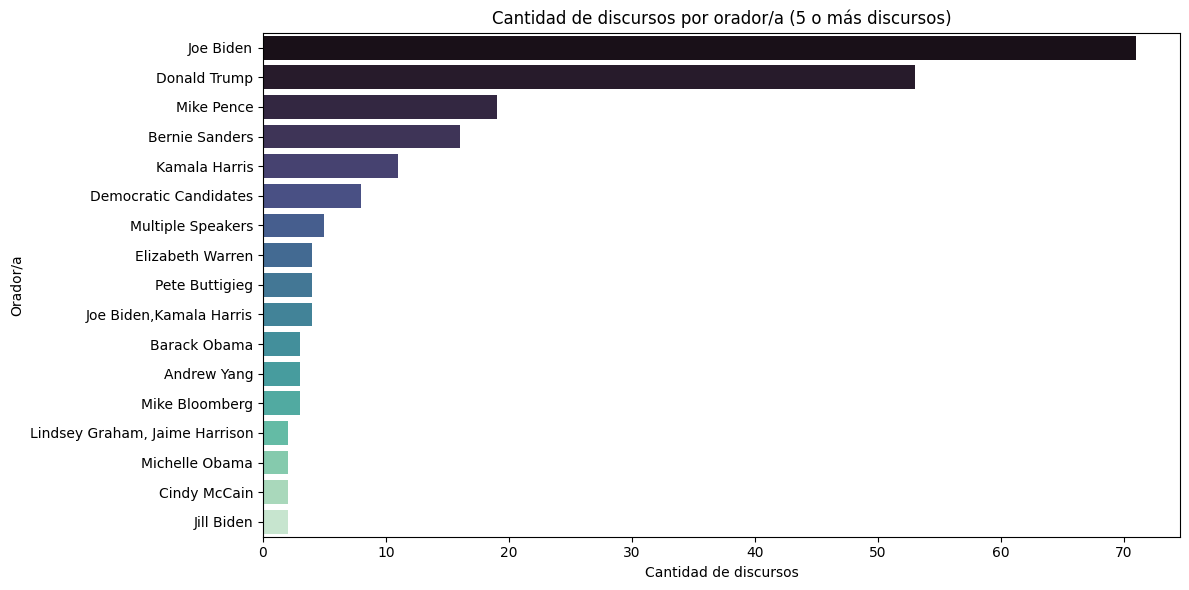

In [43]:
# Filtrar los que tienen al menos 2 discursos
filtered_counts = speech_counts[speech_counts >= 2]

# Convertir a DataFrame y ordenar
df_filtered = filtered_counts.reset_index()
df_filtered.columns = ['speaker', 'count']
df_filtered = df_filtered.sort_values(by='count', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='count', y='speaker', palette='mako')
plt.title('Cantidad de discursos por orador/a (5 o más discursos)')
plt.xlabel('Cantidad de discursos')
plt.ylabel('Orador/a')
plt.tight_layout()
plt.show()

## Multiples Oradores 

In [44]:
# Verificar cuántos registros tienen múltiples oradores (separados por coma)
df_speeches['multiple_speakers'] = df_speeches['speaker'].str.contains(',', na=False)


# Calcular cantidad y porcentaje
cantidad_dobles = df_speeches['multiple_speakers'].sum()
total_discursos = df_speeches.shape[0]
porcentaje_dobles = (cantidad_dobles / total_discursos) * 100

print(f"Cantidad de discursos con múltiples oradores: {cantidad_dobles}")
print(f"Total de discursos: {total_discursos}")
print(f"Porcentaje de discursos con múltiples oradores: {porcentaje_dobles:.2f}%")

# Filtrar discursos con múltiples oradores
df_multiples = df_speeches[df_speeches['multiple_speakers'] == True]
display(df_multiples[['speaker','type']].reset_index(drop=True))

Cantidad de discursos con múltiples oradores: 14
Total de discursos: 269
Porcentaje de discursos con múltiples oradores: 5.20%


,speaker,type
0,"Lindsey Graham, Jaime Harrison",Debate
1,"Joe Biden,Kamala Harris",Campaign Speech
2,"Kamala Harris, Mike Pence",Debate
3,"Lindsey Graham, Jaime Harrison",Debate
4,"Donald Trump, Joe Biden",Debate
5,"Joe Biden,Kamala Harris",Interview
6,"Joe Biden,Kamala Harris",NaN
7,"Joe Biden,Kamala Harris",NaN
8,"Joe Biden, Barack Obama",Campaign Speech
9,"Joe Biden,Tom Wolf",Interview


## Filtrar los discursos, sin multiples oradores y sin entradas nulas

In [45]:
# Filtrar los discursos que NO tienen múltiples speaker y que tienen un speaker válido (no nulo)
df_speeches_clean = df_speeches[
    (~df_speeches['multiple_speakers']) &  # No múltiples speaker
    (df_speeches['speaker'].notnull())     # Speaker no nulo
].copy()

# Confirmar limpieza
print(f"Cantidad de discursos luego de limpiar: {df_speeches_clean.shape[0]}")

Cantidad de discursos luego de limpiar: 252


## Los 5 con Mas discursos

In [46]:

# Tome los 5 candidatos con más discursos
# Selección de top 5 candidatos/as con más discursos
top_5_speakers = speech_counts.head(5).index.tolist()
print("\nTop 5 candidatos/as con más discursos:")
print(top_5_speakers)
print("--------------------------------------------------")
# Quedarse con los 5 con más discursos

# Filtrar el DataFrame para trabajar solo con ellos/as
df_speeches_top_5 = df_speeches_clean[df_speeches_clean['speaker'].isin(top_5_speakers)]
print(f"\nDataFrame filtrado contiene {df_speeches_top_5.shape[0]} discursos.")
display(df_speeches_top_5.head())
print("--------------------------------------------------")
print("Información general del DataFrame nuevo:")
print(df_speeches_top_5.info())


Top 5 candidatos/as con más discursos:
['Joe Biden', 'Donald Trump', 'Mike Pence', 'Bernie Sanders', 'Kamala Harris']
--------------------------------------------------

DataFrame filtrado contiene 170 discursos.


,speaker,title,text,date,location,type,multiple_speakers
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech,False
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech,False
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall,False
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall,False
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech,False


--------------------------------------------------
Información general del DataFrame nuevo:
<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 1 to 267
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   speaker            170 non-null    object
 1   title              170 non-null    object
 2   text               170 non-null    object
 3   date               170 non-null    object
 4   location           163 non-null    object
 5   type               155 non-null    object
 6   multiple_speakers  170 non-null    bool  
dtypes: bool(1), object(6)
memory usage: 9.5+ KB
None


speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


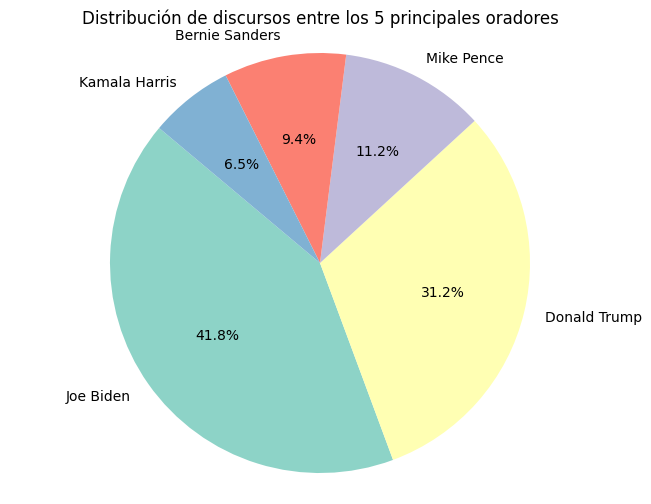

In [48]:
# Obtener top 5 oradores y sus valores
top_5_speakers = speech_counts.head(5)
labels = top_5_speakers.index
values = top_5_speakers.values

print(top_5_speakers)

# Gráfico de pastel
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors  # Paleta de colores suave
plt.pie(
    top_5_speakers,
    labels=top_5_speakers.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Distribución de discursos entre los 5 principales oradores')
plt.axis('equal')  # Mantiene el gráfico circular
plt.show()

## Visualizaciones

C:\Users\jonat\AppData\Local\Temp/ipykernel_11416/386738895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])
C:\Users\jonat\AppData\Local\Temp/ipykernel_11416/386738895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time


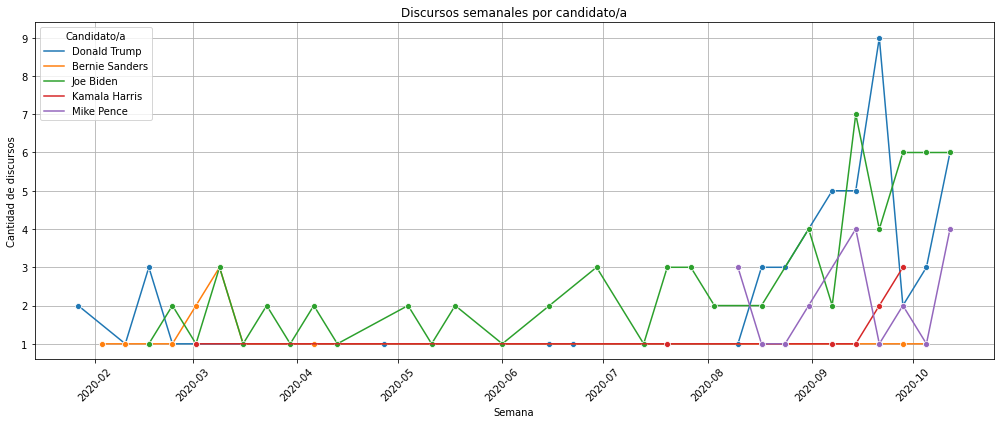

In [ ]:
#************************* PARTE 1 B *************************  

# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 
#me aseguro que date es datetime
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])

# Agrupar por semana 
df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time

# Agrupamos por semana y candidato
weekly_grouped = df_speeches_top_5.groupby(['week', 'speaker']).size().reset_index(name='speech_count')

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_grouped, x='week', y='speech_count', hue='speaker', marker='o')

plt.title('Discursos semanales por candidato/a')
plt.xlabel('Semana')
plt.ylabel('Cantidad de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Candidato/a')
plt.show()



C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\3103036895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])
C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\3103036895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time


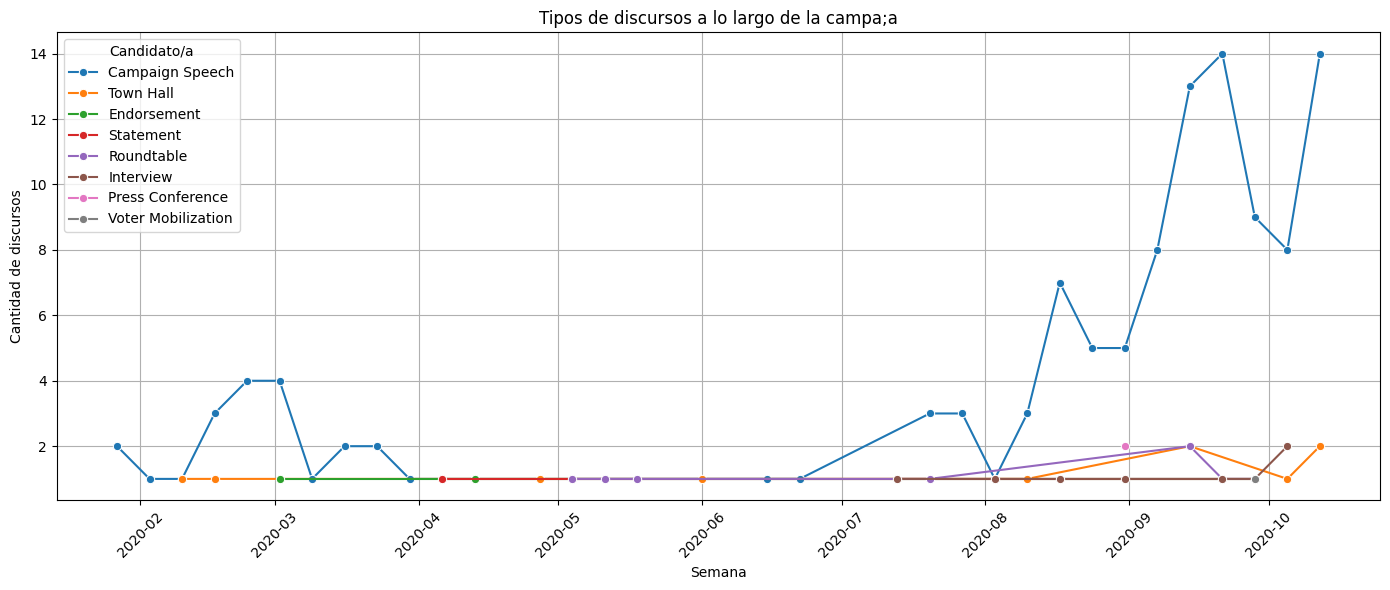

In [21]:
#me aseguro que date es datetime
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])

# Agrupar por semana 
df_speeches_top_5['week'] = df_speeches_top_5['date'].dt.to_period('W').dt.start_time

# Agrupamos por semana y tupo
weekly_grouped = df_speeches_top_5.groupby(['week', 'type']).size().reset_index(name='speech_count')

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_grouped, x='week', y='speech_count', hue='type', marker='o')

plt.title('Tipos de discursos a lo largo de la campa;a')
plt.xlabel('Semana')
plt.ylabel('Cantidad de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Candidato/a')
plt.show()

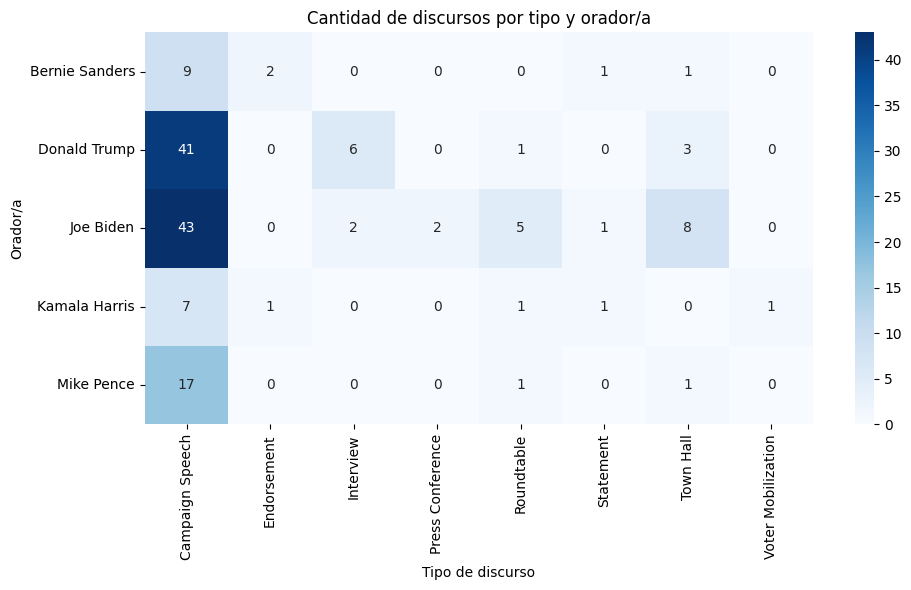

In [23]:
# Agrupar por speaker y tipo
speaker_type_counts = df_speeches_top_5.groupby(['speaker', 'type']).size().reset_index(name='count')

# Pivotear para heatmap
pivot_table = speaker_type_counts.pivot(index='speaker', columns='type', values='count').fillna(0)

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')

plt.title('Cantidad de discursos por tipo y orador/a')
plt.xlabel('Tipo de discurso')
plt.ylabel('Orador/a')
plt.tight_layout()
plt.show()

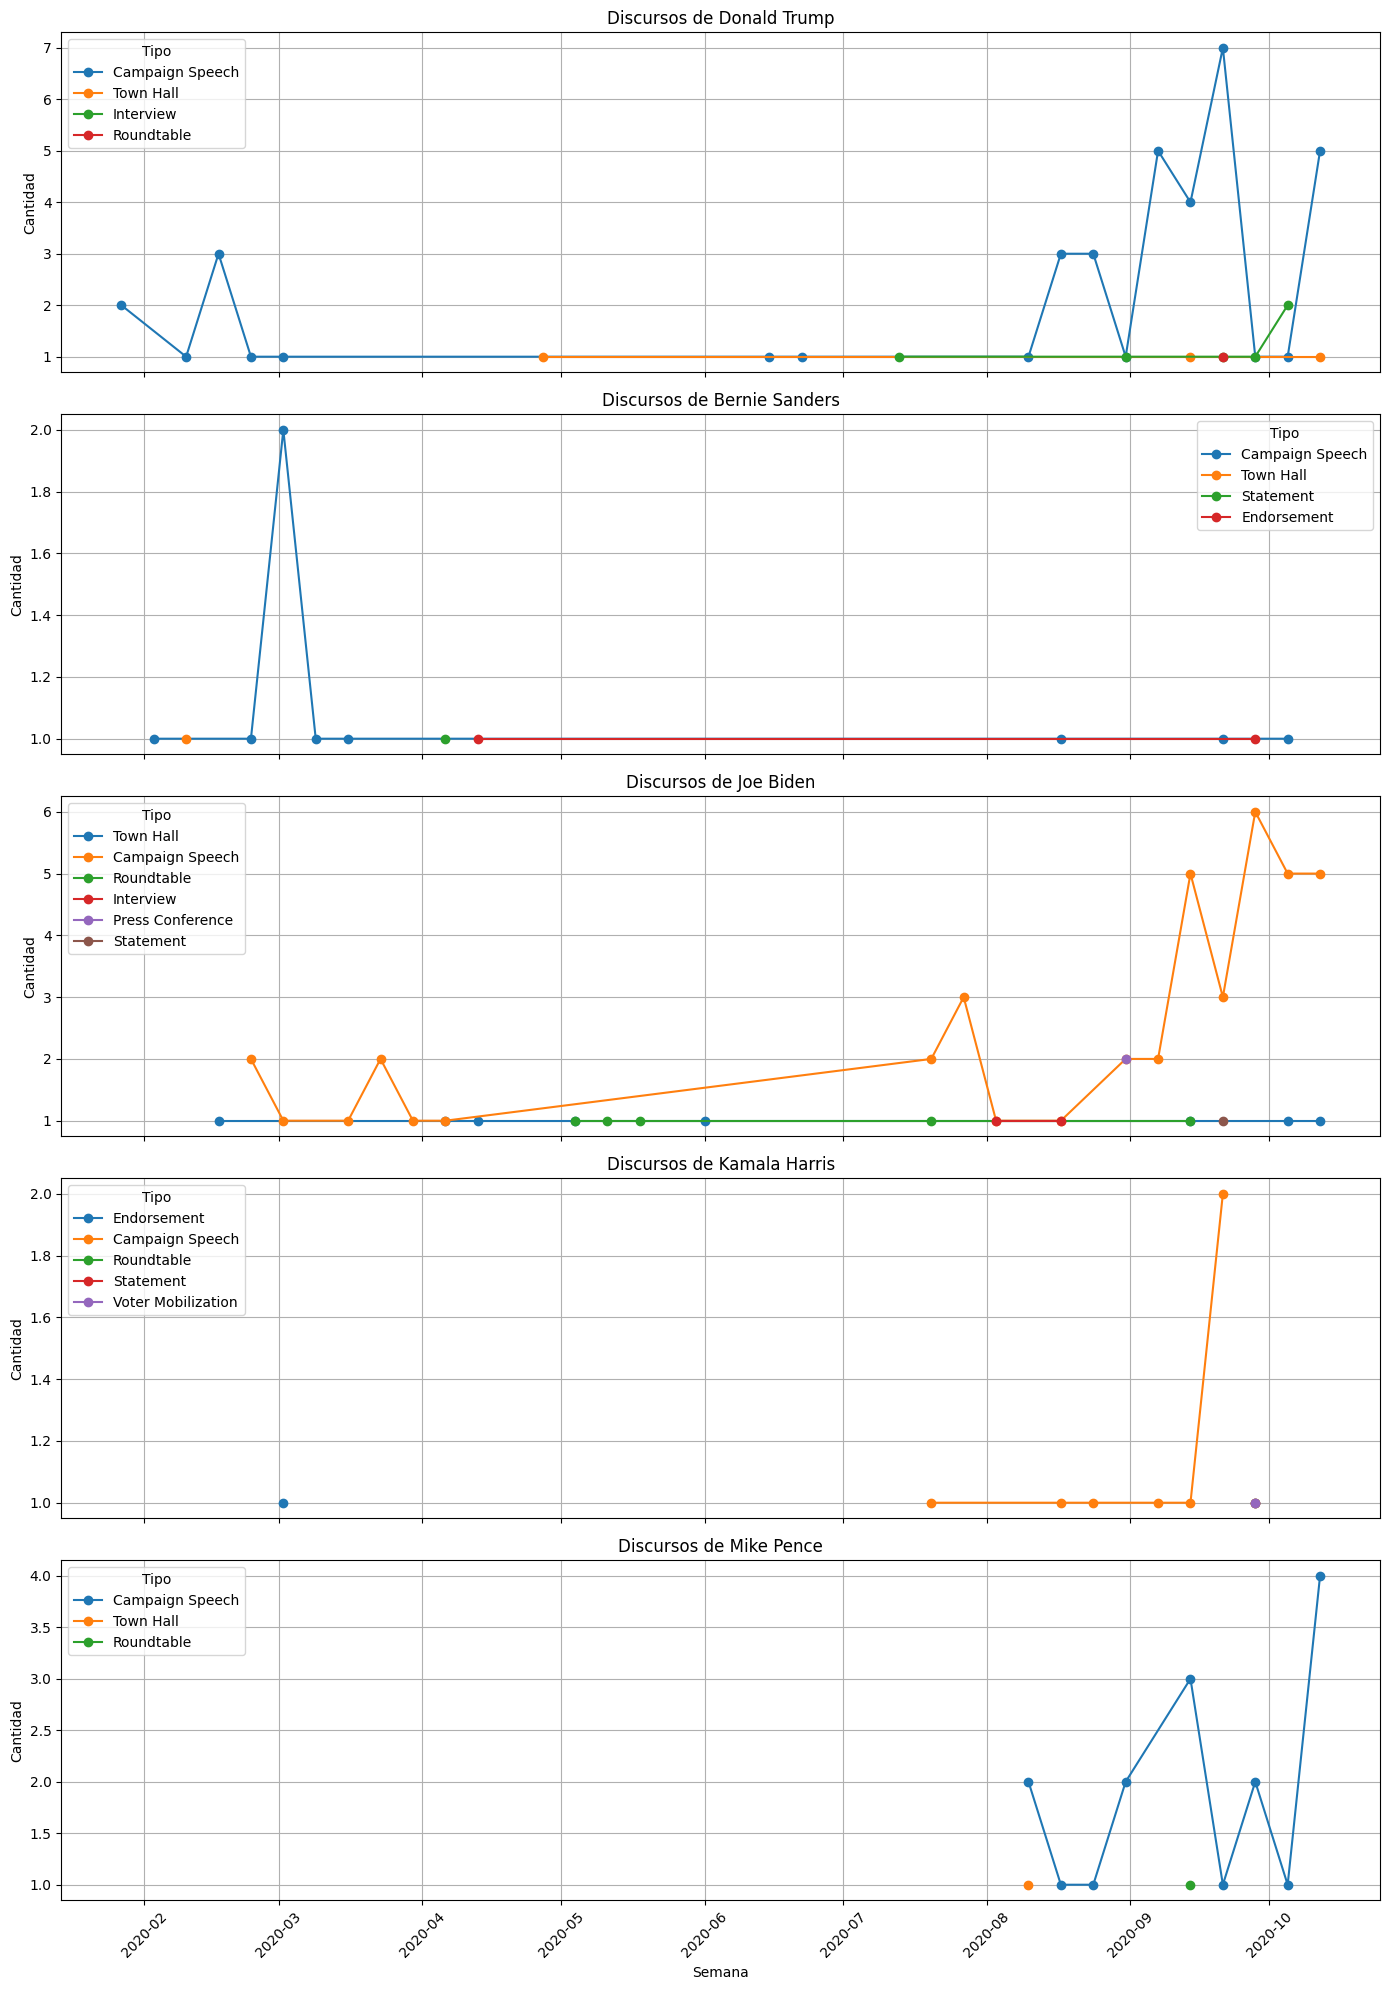

In [24]:
# Agrupamos por semana, tipo y orador
weekly_grouped_3d = df_speeches_top_5.groupby(['week', 'type', 'speaker']).size().reset_index(name='speech_count')

# Obtenemos lista de speakers únicos
speakers = weekly_grouped_3d['speaker'].unique()

# Creamos subplots
fig, axes = plt.subplots(len(speakers), 1, figsize=(14, 4 * len(speakers)), sharex=True)

for i, speaker in enumerate(speakers):
    ax = axes[i] if len(speakers) > 1 else axes
    data_speaker = weekly_grouped_3d[weekly_grouped_3d['speaker'] == speaker]
    
    for speech_type in data_speaker['type'].unique():
        data_type = data_speaker[data_speaker['type'] == speech_type]
        ax.plot(data_type['week'], data_type['speech_count'], marker='o', label=speech_type)
    
    ax.set_title(f'Discursos de {speaker}')
    ax.set_ylabel('Cantidad')
    ax.legend(title='Tipo')
    ax.grid(True)

plt.xlabel('Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

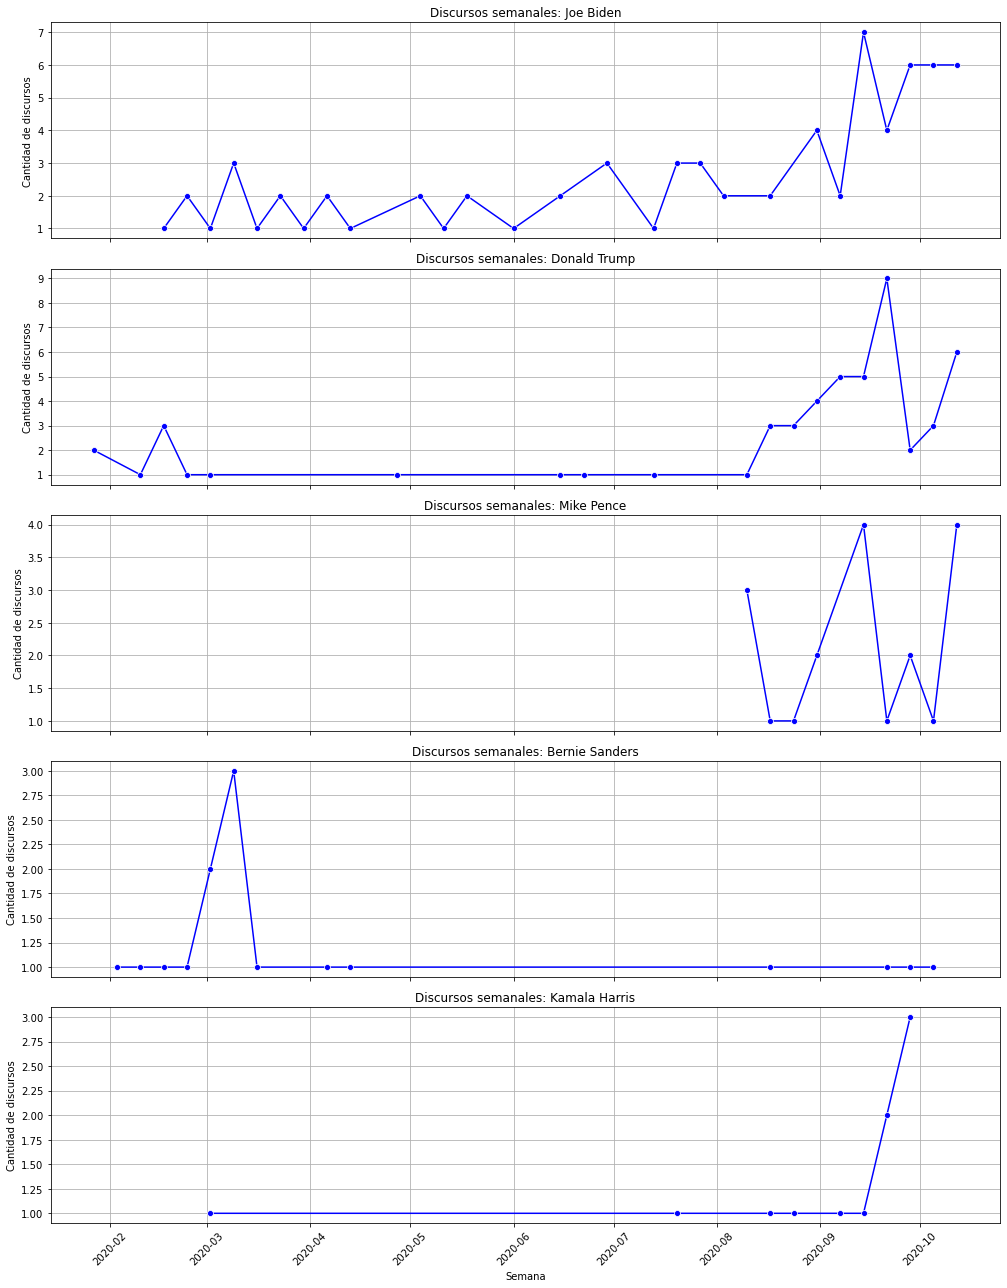

In [11]:
#Ubicar mejor temporalmente como se pasaron cada uno

# Crear una figura con 5 subgráficas (una para cada candidato)
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# Listar los 5 candidatos
candidates = df_speeches_top_5['speaker'].unique()

# Iterar sobre los candidatos y graficar en cada subgráfica
for i, candidate in enumerate(candidates):
    ax = axes[i]
    
    # Filtrar los datos para el candidato actual
    candidate_data = weekly_grouped[weekly_grouped['speaker'] == candidate]
    
    # Graficar los discursos por semana
    sns.lineplot(data=candidate_data, x='week', y='speech_count', ax=ax, marker='o', color='blue')
    
    # Añadir título y etiquetas
    ax.set_title(f'Discursos semanales: {candidate}')
    ax.set_xlabel('Semana')
    ax.set_ylabel('Cantidad de discursos')
    ax.grid(True)
    
# Ajustar diseño
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Genero un df con todos igual cantidad de discursos

In [57]:
# Dataset con máximo 11 discursos por speaker (si tienen más, se recortan)
df_top_5_max_11 = df_speeches_top_5.groupby('speaker').apply(lambda x: x.sample(n=11, random_state=42) if len(x) > 11 else x).reset_index(drop=True)

print(df_top_5_max_11['speaker'].value_counts())  # Todos deben tener como máximo 11

df_top_5_max_11


speaker
Bernie Sanders    11
Donald Trump      11
Joe Biden         11
Kamala Harris     11
Mike Pence        11
Name: count, dtype: int64


C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\4057810482.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_5_max_11 = df_speeches_top_5.groupby('speaker').apply(lambda x: x.sample(n=11, random_state=42) if len(x) > 11 else x).reset_index(drop=True)


,speaker,title,text,date,location,type,multiple_speakers
0,Bernie Sanders,Bernie Sanders Ann Arbor Campaign Speech for J...,Bernie Sanders: (00:01)\r\nBut if these were n...,"Oct 5, 2020","Ann Arbor, Michigan",Campaign Speech,False
1,Bernie Sanders,Bernie Sanders NH Rally Speech for Joe Biden &...,Bernie Sanders: (00:11)\r\nI have participated...,"Oct 3, 2020","Lebanon, New Hampshire",Endorsement,False
2,Bernie Sanders,Transcript: Bernie Sanders Announces He’s Drop...,Bernie Sanders: (00:03)\r\nGood morning and th...,"Apr 8, 2020",Virtual,Statement,False
3,Bernie Sanders,Bernie Sanders New Hampshire Town Hall Transcript,Bernie Sanders: (00:00)\r\nThank you. Thank yo...,"Feb 10, 2020",New Hampshire,Town Hall,False
4,Bernie Sanders,Bernie Sanders Russia Interference Interview T...,Bernie Sanders: (00:01)\r\nI’ve seen Russia an...,"Feb 21, 2020",NaN,NaN,False
5,Bernie Sanders,Bernie Sanders Los Angeles Rally Transcript Be...,Bernie Sanders: (00:00)\r\nLA. Thank you LA.\r...,"Mar 2, 2020","Los Angeles, California",Campaign Speech,False
6,Bernie Sanders,Bernie Sanders News Conference Speech Transcri...,Bernie Sanders: (05:50)\r\nOkay. Thank you all...,"Mar 11, 2020","Burlington, Vermont",NaN,False
7,Bernie Sanders,Bernie Sanders St. Louis Rally Speech Transcri...,"Crowd: (00:05)\r\nBernie, Bernie, Bernie-\r\nB...","Mar 9, 2020","St. Louis, Missouri",NaN,False
8,Bernie Sanders,Bernie Sanders Speech Transcript: ‘Trump’s Thr...,Bernie Sanders: (05:27)\r\nLet me thank all of...,"Sep 24, 2020","Washington, D.C",Campaign Speech,False
9,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\r\nJust want to take t...,"Feb 6, 2020",Iowa,Campaign Speech,False


Dejo a Biden y Trump con la misma cantidad de discursos, el resto como estan

In [58]:
# Obtener los dos primeros oradores
top_2_speakers = df_speeches_top_5['speaker'].value_counts().head(2)
min_count = top_2_speakers.iloc[1]  # Cantidad del segundo orador

# Filtrar solo esos dos oradores
df_top2 = df_speeches_top_5[df_speeches_top_5['speaker'].isin(top_2_speakers.index)]

# Recortar ambos a la misma cantidad de discursos
df_top2_equal = df_top2.groupby('speaker').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)

# Agregar el resto de oradores sin modificar
df_rest = df_speeches_top_5[~df_speeches_top_5['speaker'].isin(top_2_speakers.index)]

# Concatenar ambos datasets
df_equal_top2_full = pd.concat([df_top2_equal, df_rest], ignore_index=True)

print(df_equal_top2_full['speaker'].value_counts())  # Los dos primeros deben tener la misma cantidad

df_equal_top2_full

speaker
Donald Trump      53
Joe Biden         53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


C:\Users\juanp\AppData\Local\Temp\ipykernel_31412\2381138946.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top2_equal = df_top2.groupby('speaker').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)


,speaker,title,text,date,location,type,multiple_speakers
0,Donald Trump,Donald Trump Campaign Speech Transcript Vandal...,Crowd: (00:00)\r\nUSA. USA. USA. USA. USA. USA...,"Sep 21, 2020","Vandalia, Ohio",Campaign Speech,False
1,Donald Trump,Donald Trump Chris Wallace Interview Transcrip...,Chris Wallace: (00:00)\r\nAnd hello again from...,"Jul 19, 2020",Fox News,Interview,False
2,Donald Trump,"Donald Trump Las Vegas, Nevada Rally Transcript","Donald Trump: (01:19)\r\nWell, thank you very ...","Feb 21, 2020","Las Vegas, Nevada",Campaign Speech,False
3,Donald Trump,"Donald Trump Middletown, PA Rally Speech Trans...","Speaker 1: (00:06)\r\nUSA, USA, USA, USA, USA,...","Sep 27, 2020","Middletown, Pennsylvania",Campaign Speech,False
4,Donald Trump,"Donald Trump Tulsa, Oklahoma Rally Speech Tran...","Donald Trump: (01:11)\r\nThank you, thank you....","Jun 21, 2020","Tulsa, Oklahoma",Campaign Speech,False
...,...,...,...,...,...,...,...
147,Bernie Sanders,Bernie Sanders Los Angeles Rally Transcript Be...,Bernie Sanders: (00:00)\r\nLA. Thank you LA.\r...,"Mar 2, 2020","Los Angeles, California",Campaign Speech,False
148,Bernie Sanders,"Bernie Sanders Columbia, South Carolina Rally ...","Bernie Sanders: (00:00)\r\n… Is about, is sayi...","Feb 28, 2020","Columbia, South Carolina",Campaign Speech,False
149,Bernie Sanders,Bernie Sanders Russia Interference Interview T...,Bernie Sanders: (00:01)\r\nI’ve seen Russia an...,"Feb 21, 2020",NaN,NaN,False
150,Bernie Sanders,Bernie Sanders New Hampshire Town Hall Transcript,Bernie Sanders: (00:00)\r\nThank you. Thank yo...,"Feb 10, 2020",New Hampshire,Town Hall,False


## Limpieza de Texto y Conteo de Palabras

In [ ]:
#************************* PARTE 1 C *************************  


def clean_text(df, column_name):
    # Eliminar el encabezado inicial hasta el primer salto de línea
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir a minúsculas
    result = result.str.lower()
    
    # Reemplazar signos de puntuación comunes por espacios
    punctuation = ["[", "\n", ",", ":", "?", ".", "!", ";", "(", ")", "\"", "'"]
    for punc in punctuation:
        result = result.str.replace(punc, " ", regex=False)
    
    # Reemplazar múltiples espacios por uno solo
    result = result.str.replace(r'\s+', ' ', regex=True)
    
    # Eliminar espacios al inicio y al final
    result = result.str.strip()
    
    return result


# TODO: Creamos una nueva columna CleanText a partir de text
# df_speeches_top_5["CleanText"] = 
# Aplicar la limpieza al DataFrame
df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, "text")

# Verificamos que el texto ha sido limpiado correctamente
df_speeches_top_5[["text", "CleanText"]].head()

#  Se normalizó el texto convirtiéndolo a minúsculas,
#  eliminando signos de puntuación( se agregaron signos de puntuación faltantes),
#  espacios extra y bordes



C:\Users\jonat\AppData\Local\Temp/ipykernel_11416/1135042857.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, "text")


,text,CleanText
1,"Joe Biden: (00:00)\nHello, Michigan. Hi, how a...",hello michigan hi how are you what’s your name...
2,President Trump: (00:30)\nThank you. What a ni...,thank you what a nice group thank you very muc...
3,"George Stephanopoulos: (00:41)\nHey, and welco...",hey and welcome to our town hall with joe bide...
4,Savannah Guthrie: (03:50)\nIt’s nothing but no...,it’s nothing but noise what okay all right lad...
5,Donald Trump: (01:25)\nThank you very much. Th...,thank you very much thank you let’s see it’s 1...


In [13]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

C:\Users\jonat\AppData\Local\Temp/ipykernel_11416/4065927248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()


,CleanText,WordList
1,hello michigan hi how are you what’s your name...,"[hello, michigan, hi, how, are, you, what’s, y..."
2,thank you what a nice group thank you very muc...,"[thank, you, what, a, nice, group, thank, you,..."
3,hey and welcome to our town hall with joe bide...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it’s nothing but noise what okay all right lad...,"[it’s, nothing, but, noise, what, okay, all, r..."
5,thank you very much thank you let’s see it’s 1...,"[thank, you, very, much, thank, you, let’s, se..."
...,...,...
257,hello manchester and i am thrilled to be in th...,"[hello, manchester, and, i, am, thrilled, to, ..."
260,thank you thank you all for coming out let me ...,"[thank, you, thank, you, all, for, coming, out..."
264,just want to take this opportunity to thank al...,"[just, want, to, take, this, opportunity, to, ..."
266,i worked so hard for this state i worked so ha...,"[i, worked, so, hard, for, this, state, i, wor..."


# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

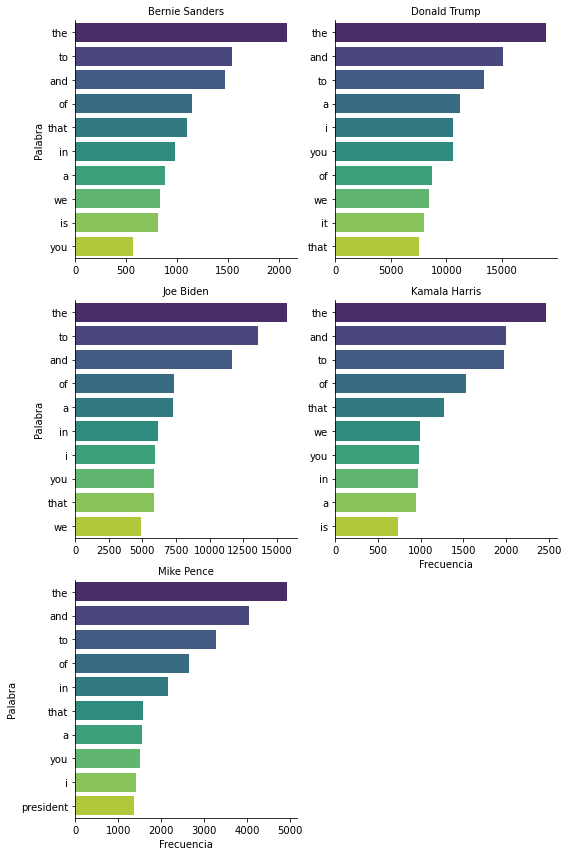

In [ ]:
#************************* PARTE 2 A *************************  

#TODO: Realice una visualización que permita comparar las palabras más frecuentes de
#cada uno de los cinco candidatos/as.
#Sin necesidad de implementarlo, proponga ideas para modificar esta visualización
#con el fin de encontrar diferencias entre partidos políticos, fechas, o lugares.


# Expandir la lista de palabras a filas
df_words = df_speeches_top_5.explode('WordList')

# Agrupar por candidato y palabra, y contar
word_counts = df_words.groupby(['speaker', 'WordList']).size().reset_index(name='count')

# Para cada candidato, seleccionamos las 10 palabras más frecuentes
top_words_per_speaker = word_counts.groupby('speaker').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Gráfica
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(top_words_per_speaker, col='speaker', col_wrap=2, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='count', y='WordList', palette="viridis", orient='h')

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Frecuencia", "Palabra")
g.tight_layout()
plt.show()

Observamos que las palabras más comunes en la visualización actual son términos muy generales como "the", "to", "and", "of", "you", "we", etc., que aparecen en todos los discursos y no reflejan diferencias significativas entre candidatos o partidos.

Para mejorar esta visualización y facilitar la comparación por partido político, fecha o lugar, se podrían aplicar varios ajustes:

Eliminar stopwords y palabras vacías que no aportan contenido semántico.

Aplicar lematización, para agrupar palabras con el mismo significado.

Filtrar por categorías gramaticales (por ejemplo, centrarse en sustantivos o frases clave).

Normalizar la cantidad de discursos por candidato o agrupar por partido, para que la comparación sea más justa.

Agregar dimensión temporal o geográfica a la visualización, permitiendo ver cómo cambia el discurso según la fecha o el lugar del evento.

In [ ]:
#************************* PARTE 2 B *************************  
#TODO: Corra el código que permite encontrar los candidatos/as con mayor cantidad de
#palabras. En caso de encontrar algún problema luego de realizar la visualización,
#comente a qué se debe y proponga formas de resolverlo.


# Primero, creamos una nueva columna con la cantidad de palabras por discurso

df_speeches_top_5['word_count'] = df_speeches_top_5['WordList'].apply(len)

# Ahora agrupamos por candidato y sumamos la cantidad total de palabras
total_words_per_speaker = df_speeches_top_5.groupby('speaker')['word_count'].sum().reset_index()

# Ordenamos de mayor a menor
total_words_per_speaker = total_words_per_speaker.sort_values(by='word_count', ascending=False)

# Mostramos el resultado
print(total_words_per_speaker)

          speaker  word_count
1    Donald Trump      536266
2       Joe Biden      379568
4      Mike Pence      102853
3   Kamala Harris       57944
0  Bernie Sanders       47307


C:\Users\jonat\AppData\Local\Temp/ipykernel_11416/806275159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['word_count'] = df_speeches_top_5['WordList'].apply(len)


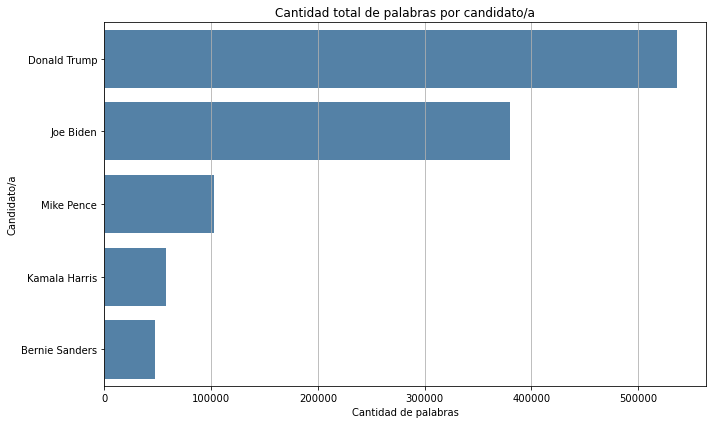

In [16]:
# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_words_per_speaker,
    x='word_count',
    y='speaker',
    color='steelblue'  # Un solo color
)

plt.title('Cantidad total de palabras por candidato/a')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Candidato/a')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
#************************* PARTE 2 C *************************  

# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a, 
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones. 
# Puede ser util la biblioteca networkx

In [18]:
candidates = df_speeches_top_5['speaker'].unique()

# Inicializamos matriz vacía
mentions_matrix = pd.DataFrame(0, index=candidates, columns=candidates)

# Buscamos menciones
for _, row in df_speeches_top_5.iterrows():
    speaker = row['speaker']
    text = row['CleanText'].lower()
    
    for candidate in candidates:
        if candidate.lower() in text:
            mentions_matrix.loc[speaker, candidate] += 1

mentions_matrix

,Joe Biden,Donald Trump,Mike Pence,Bernie Sanders,Kamala Harris
Joe Biden,71,53,1,5,12
Donald Trump,44,51,24,30,8
Mike Pence,19,19,19,5,8
Bernie Sanders,10,12,0,16,1
Kamala Harris,11,9,0,0,10


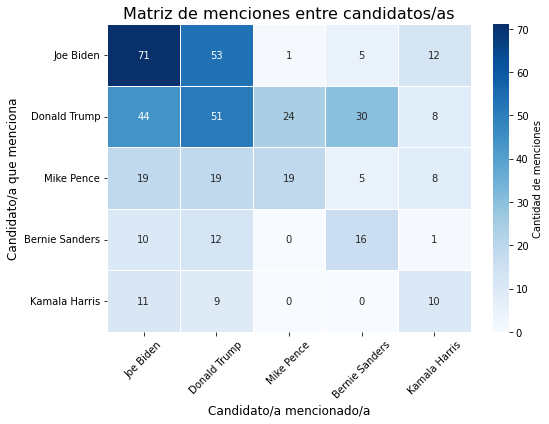

In [19]:
plt.figure(figsize=(8, 6))

# Crear heatmap
sns.heatmap(
    mentions_matrix,
    annot=True,            # Mostrar los números
    fmt='d',                # Formato entero
    cmap='Blues',           # Mapa de colores (más oscuro = más menciones)
    linewidths=0.5,         # Líneas entre celdas
    cbar_kws={'label': 'Cantidad de menciones'}  # Barra de color
)

# Títulos y etiquetas
plt.title('Matriz de menciones entre candidatos/as', fontsize=16)
plt.xlabel('Candidato/a mencionado/a', fontsize=12)
plt.ylabel('Candidato/a que menciona', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

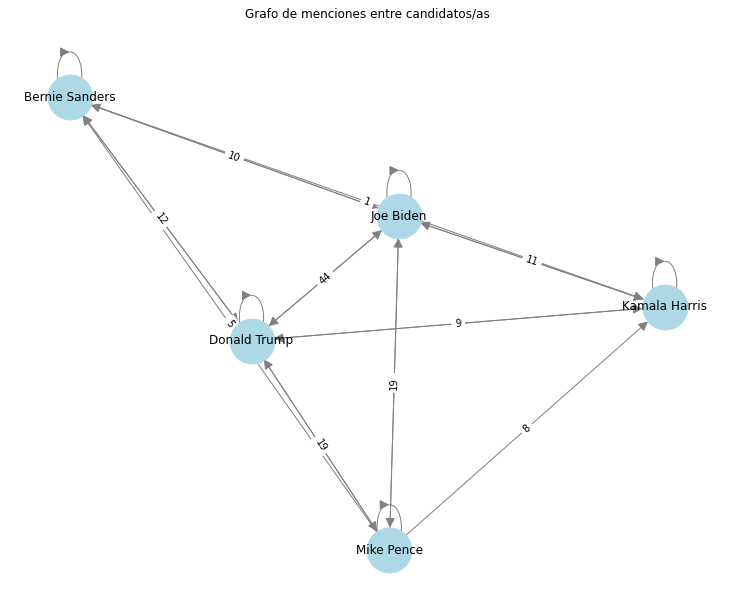

In [20]:
G = nx.from_pandas_adjacency(mentions_matrix, create_using=nx.DiGraph())

# Dibujar grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # layout de nodos

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2000,
    font_size=12,
    arrowsize=20,
    edge_color='gray'
)

# Añadir etiquetas de peso en las aristas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Grafo de menciones entre candidatos/as')
plt.show()

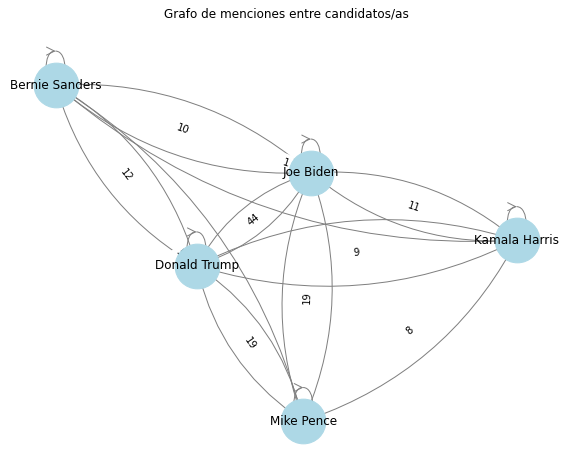

In [21]:
G = nx.from_pandas_adjacency(mentions_matrix, create_using=nx.DiGraph())

# Dibujar grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # layout de nodos

# Dibujar nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=12)

# Dibujar aristas con curvatura
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='->',
    arrowsize=20,
    edge_color='gray',
    connectionstyle='arc3, rad=0.2'  # <- Acá agregamos la curvatura
)

# Añadir etiquetas de peso en las aristas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Grafo de menciones entre candidatos/as')
plt.axis('off')
plt.show()
